In [170]:
import pandas as pd
import numpy as np

In [187]:
data = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\CAPSTONE2\complaints.csv\complaints.csv")
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-05-09,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"Spring Oaks Capital, LLC",GA,30168,NaN,NaN,Web,2025-05-22,Closed with explanation,Yes,NaN,13439124.0
1,2025-05-11,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Resurgent Capital Services L.P.,MD,21075,NaN,NaN,Web,2025-05-22,Closed with non-monetary relief,Yes,NaN,13447616.0
2,2025-05-10,Prepaid card,General-purpose prepaid card,Trouble using the card,Trouble using the card to spend money in a sto...,NaN,NaN,Incomm Holdings Inc.,CA,94123,Servicemember,NaN,Web,2025-05-22,Closed with explanation,Yes,NaN,13445015.0
3,2025-05-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"Maximus Federal Services, Inc.",MD,20706,NaN,NaN,Web,2025-05-20,Closed with explanation,Yes,NaN,13441202.0
4,2025-05-10,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",PA,15237,NaN,Consent not provided,Web,2025-05-22,Closed with explanation,Yes,NaN,13446558.0


## DATA CLEANING

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860377 entries, 0 to 2860376
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 object 
 1   Product                       object 
 2   Sub-product                   object 
 3   Issue                         object 
 4   Sub-issue                     object 
 5   Consumer complaint narrative  object 
 6   Company public response       object 
 7   Company                       object 
 8   State                         object 
 9   ZIP code                      object 
 10  Tags                          object 
 11  Consumer consent provided?    object 
 12  Submitted via                 object 
 13  Date sent to company          object 
 14  Company response to consumer  object 
 15  Timely response?              object 
 16  Consumer disputed?            object 
 17  Complaint ID                  float64
dtypes: float64(1), object(

In [188]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                       13128
Issue                                 0
Sub-issue                        101237
Consumer complaint narrative    2157968
Company public response         1452022
Company                               1
State                              7256
ZIP code                           1427
Tags                            2752144
Consumer consent provided?       660821
Submitted via                         1
Date sent to company                  1
Company response to consumer          2
Timely response?                      1
Consumer disputed?              2826715
Complaint ID                          1
dtype: int64

In [189]:
data["Date received"] = pd.to_datetime(data["Date received"])
df_decade = data[(data["Date received"] >= "2014-01-01") & (data["Date received"] <= "2024-12-31")]
df_decade['Month'] = df_decade['Date received'].dt.month_name().str[:3]
df_decade["Year"] = df_decade["Date received"].dt.year
df_decade

C:\Users\USER\AppData\Local\Temp\ipykernel_10416\2774736348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade['Month'] = df_decade['Date received'].dt.month_name().str[:3]
C:\Users\USER\AppData\Local\Temp\ipykernel_10416\2774736348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade["Year"] = df_decade["Date received"].dt.year


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Month,Year
2704,2017-01-04,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"EQUIFAX, INC.",MD,20878,Older American,Consent not provided,Web,2017-01-04,Closed with explanation,Yes,Yes,2275255.0,Jan,2017
2970,2015-09-11,Debt collection,Mortgage,Cont'd attempts collect debt not owed,Debt was discharged in bankruptcy,NaN,NaN,"Seterus, Inc.",AL,36804,NaN,NaN,Referral,2015-09-17,Closed with explanation,Yes,No,1561212.0,Sep,2015
3714,2016-02-01,Bank account or service,Savings account,Deposits and withdrawals,NaN,NaN,NaN,DISCOVER BANK,FL,32162,NaN,NaN,Referral,2016-02-04,Closed with explanation,Yes,No,1767777.0,Feb,2016
3822,2014-05-06,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Experian Information Solutions Inc.,TX,75287,NaN,NaN,Web,2014-05-08,Closed with non-monetary relief,Yes,No,840833.0,May,2014
4222,2014-05-27,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",OR,97233,NaN,NaN,Web,2014-05-27,Closed with explanation,Yes,No,867962.0,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860372,2024-08-09,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,I have already sent a letter addressing the in...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33401,NaN,Consent provided,Web,2024-08-09,Closed with non-monetary relief,Yes,NaN,9746793.0,Aug,2024
2860373,2024-09-24,"Payday loan, title loan, personal loan, or adv...",Personal line of credit,Struggling to pay your loan,NaN,XXXX XXXX recently went out of business and no...,NaN,Alorica Inc.,MA,02472,NaN,Consent provided,Web,2024-09-27,Closed with explanation,Yes,NaN,10217038.0,Sep,2024
2860374,2024-09-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,10018,NaN,Consent not provided,Web,2024-09-24,Closed with explanation,Yes,NaN,10231564.0,Sep,2024
2860375,2022-04-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30263,NaN,Consent not provided,Web,2022-04-21,Closed with explanation,Yes,NaN,5475201.0,Apr,2022


In [175]:
df_decade.shape

(1254861, 20)

In [176]:
df_decade = df_decade.drop(columns=["Sub-issue", "Consumer complaint narrative", "State", "ZIP code", "Tags", "Consumer consent provided?", "Company public response", "Complaint ID", "Consumer disputed?"])
df_decade = df_decade.drop_duplicates()
df_decade.head()

,Date received,Product,Sub-product,Issue,Company,Submitted via,Date sent to company,Company response to consumer,Timely response?,Month,Year
2704,2017-01-04,Credit reporting,NaN,Incorrect information on credit report,"EQUIFAX, INC.",Web,2017-01-04,Closed with explanation,Yes,Jan,2017
2970,2015-09-11,Debt collection,Mortgage,Cont'd attempts collect debt not owed,"Seterus, Inc.",Referral,2015-09-17,Closed with explanation,Yes,Sep,2015
3714,2016-02-01,Bank account or service,Savings account,Deposits and withdrawals,DISCOVER BANK,Referral,2016-02-04,Closed with explanation,Yes,Feb,2016
3822,2014-05-06,Credit reporting,NaN,Incorrect information on credit report,Experian Information Solutions Inc.,Web,2014-05-08,Closed with non-monetary relief,Yes,May,2014
4222,2014-05-27,Credit reporting,NaN,Incorrect information on credit report,"EQUIFAX, INC.",Web,2014-05-27,Closed with explanation,Yes,May,2014


## VISUALIZATION

In [177]:
top_companies = df_decade["Company"].value_counts().head(10)
top_methods = df_decade["Submitted via"].value_counts()
top_products = df_decade["Product"].value_counts().head(5)
top_issues = df_decade["Issue"].value_counts().head(5)

print("Top companies:", top_companies, "\n")
print("Top methods:", top_methods, "\n")
print("Top products:", top_products, "\n")
print("Top issues:", top_issues)

Top companies: Company
EQUIFAX, INC.                             21114
Experian Information Solutions Inc.       19557
TRANSUNION INTERMEDIATE HOLDINGS, INC.    15545
JPMORGAN CHASE & CO.                      10384
CITIBANK, N.A.                             8263
WELLS FARGO & COMPANY                      8254
BANK OF AMERICA, NATIONAL ASSOCIATION      7570
CAPITAL ONE FINANCIAL CORPORATION          7477
SYNCHRONY FINANCIAL                        5612
U.S. BANCORP                               3406
Name: count, dtype: int64 

Top methods: Submitted via
Web             209793
Phone            15224
Referral         13556
Postal mail       5929
Fax                869
Web Referral       123
Email                6
Name: count, dtype: int64 

Top products: Product
Debt collection                                                                 49932
Credit reporting or other personal consumer reports                             45923
Credit reporting, credit repair services, or other personal

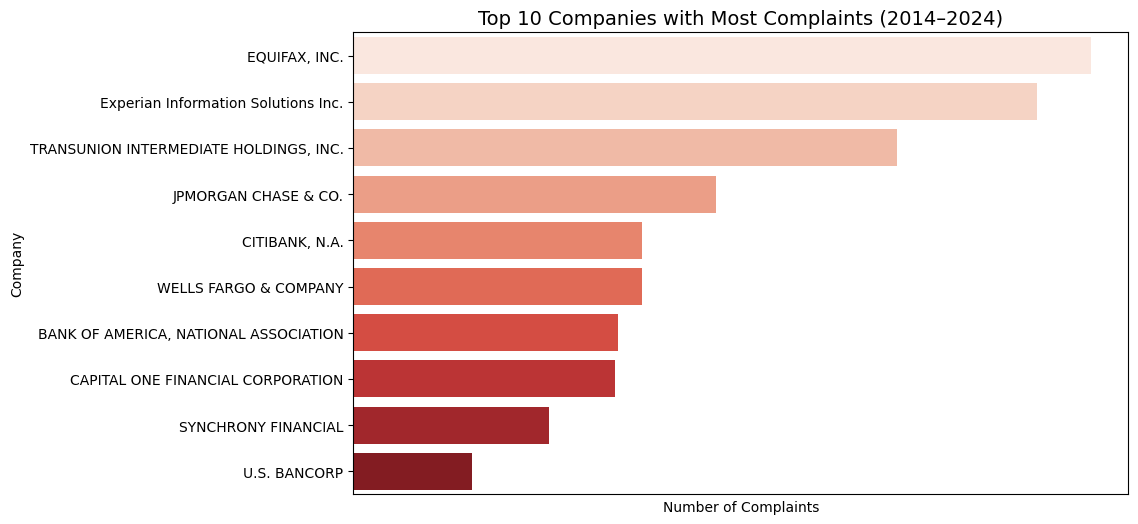

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index, palette="Reds", legend=False)
plt.title("Top 10 Companies with Most Complaints (2014–2024)", fontsize=14)
plt.xlabel("Number of Complaints")
plt.ylabel("Company")
plt.xticks([])
plt.show()

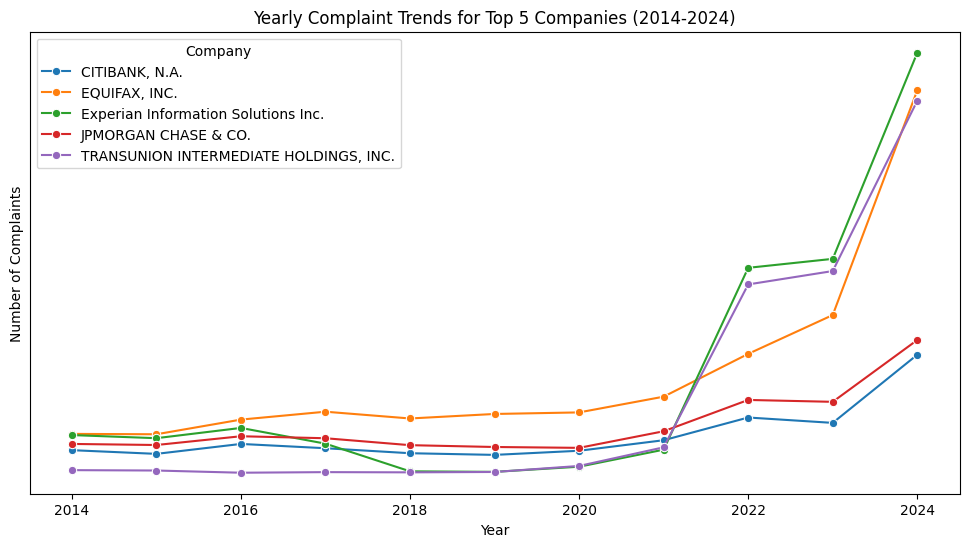

In [179]:
top_5_companies = df_decade["Company"].value_counts().head(5).index
top_5_df = df_decade[df_decade["Company"].isin(top_5_companies)]
trends = top_5_df.groupby(["Year", "Company"]).size().reset_index(name="Complaint Count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=trends, x="Year", y="Complaint Count", hue="Company", marker="o")
plt.title("Yearly Complaint Trends for Top 5 Companies (2014-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.yticks([])
plt.show()

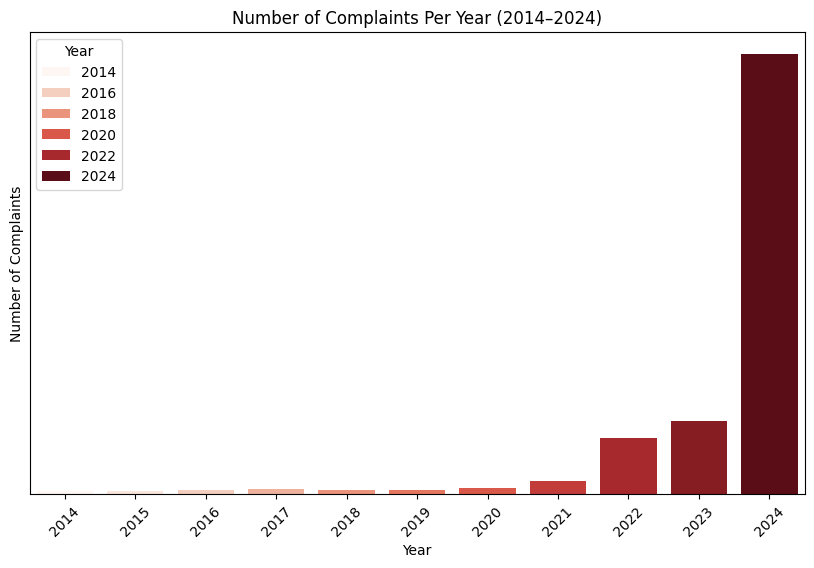

In [190]:
yearly_counts = df_decade['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, hue=yearly_counts.index, palette="Reds")
plt.title("Number of Complaints Per Year (2014–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.yticks([])
plt.show()

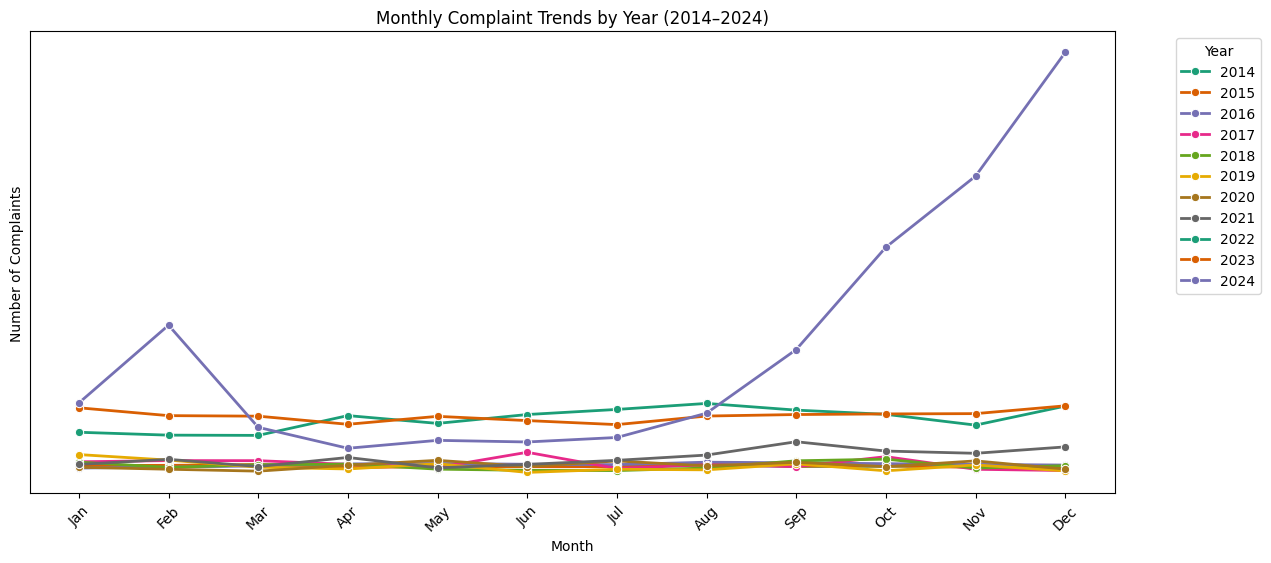

In [181]:
df_decade['Month'] = df_decade['Date received'].dt.month_name().str[:3]
monthly_trends = df_decade.groupby(['Year', 'Month']).size().reset_index(name='Complaint Count')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_trends['Month'] = pd.Categorical(monthly_trends['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trends, x='Month', y='Complaint Count', hue='Year', marker='o', linewidth=2, palette='Dark2')

plt.title('Monthly Complaint Trends by Year (2014–2024)')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.yticks([])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

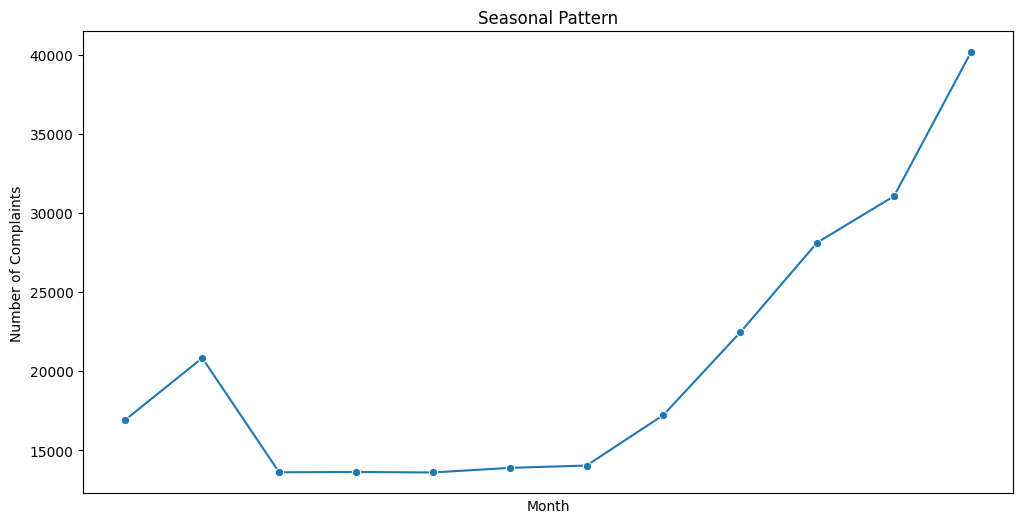

In [182]:
df_decade['Month'] = df_decade['Date received'].dt.month
df_decade['Month Name'] = df_decade['Date received'].dt.strftime('%B')

monthly_trend = df_decade.groupby(['Month', 'Month Name']).size().reset_index(name='Complaint Count')
monthly_trend = monthly_trend.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month Name', y='Complaint Count', data=monthly_trend, marker='o')
plt.title("Seasonal Pattern")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.xticks([])
plt.show()

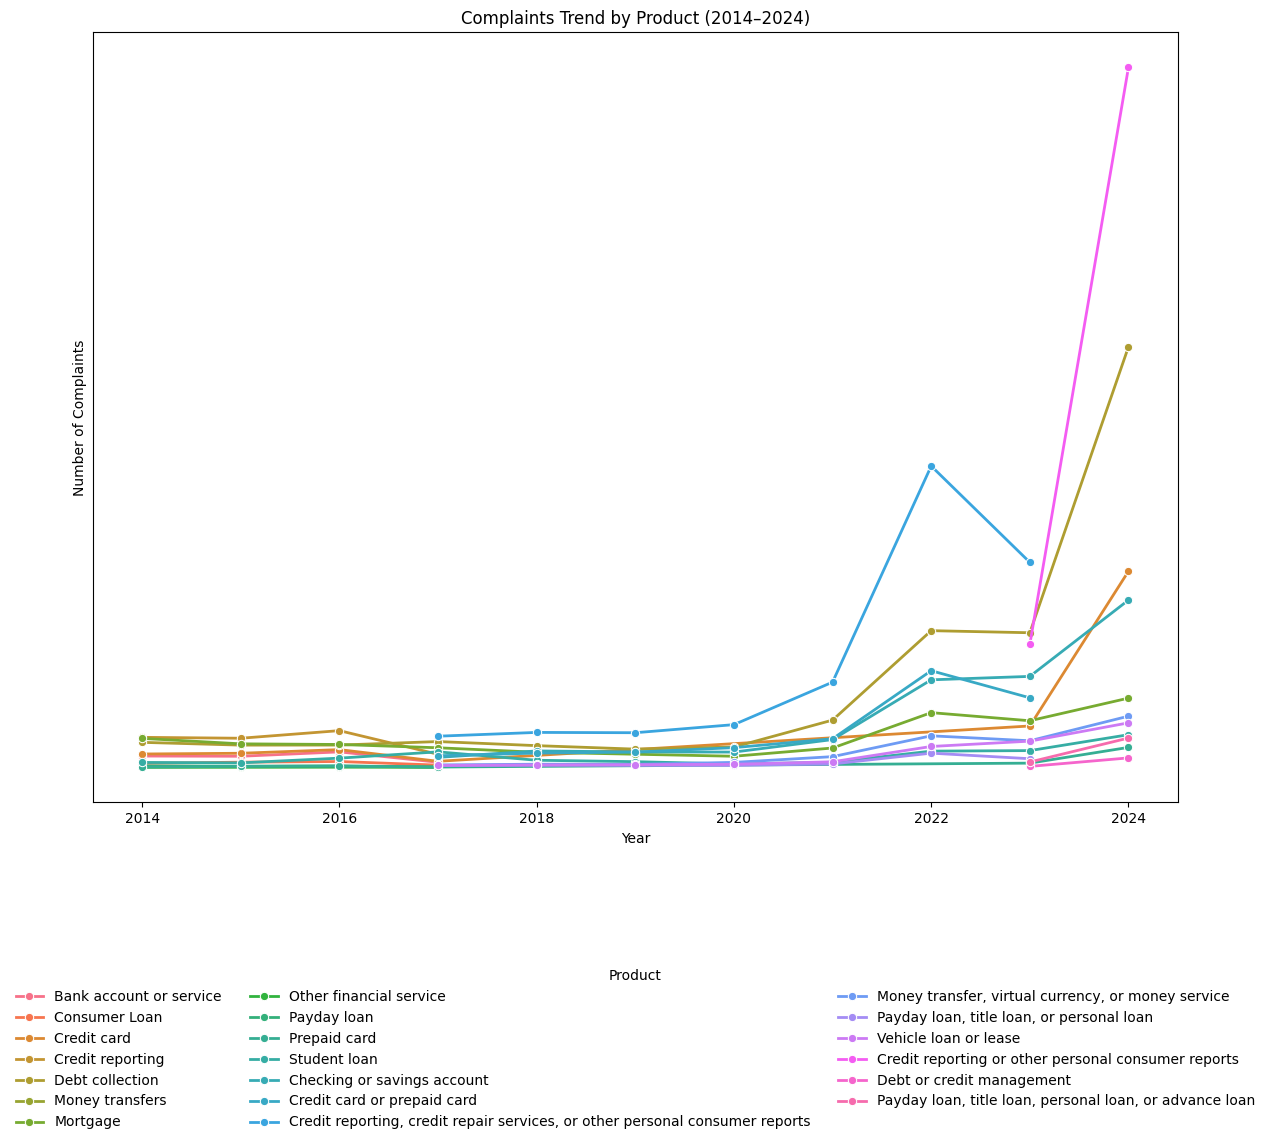

In [183]:
product_year_trend = df_decade.groupby(['Year', 'Product']).size().reset_index(name='Complaint Count')

plt.figure(figsize=(14, 10))
sns.lineplot(data=product_year_trend, x='Year', y='Complaint Count', hue='Product', marker='o', linewidth=2)
plt.title("Complaints Trend by Product (2014–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.yticks([])
plt.legend(title='Product', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)
plt.show()

<Figure size 1400x1000 with 0 Axes>

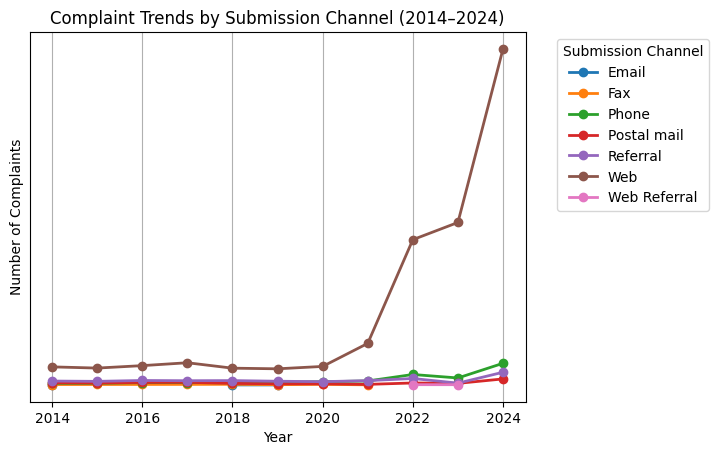

In [184]:
channel_year_trend = df_decade.groupby(['Year', 'Submitted via']).size().reset_index(name='Complaint Count')

pivot_channel_year = channel_year_trend.pivot(index='Year', columns='Submitted via', values='Complaint Count')

plt.figure(figsize=(14, 10))
pivot_channel_year.plot(marker='o', linewidth=2)
plt.title("Complaint Trends by Submission Channel (2014–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.yticks([])
plt.grid(True)
plt.legend(title='Submission Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

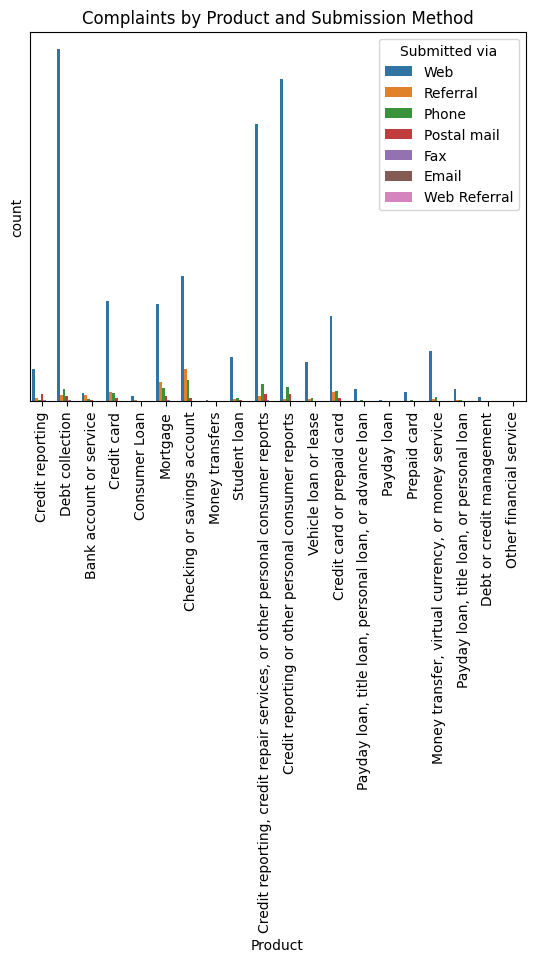

In [185]:
sns.countplot(data=df_decade, x='Product', hue='Submitted via')
plt.xticks(rotation=90)
plt.title("Complaints by Product and Submission Method")
plt.yticks([])
plt.show()

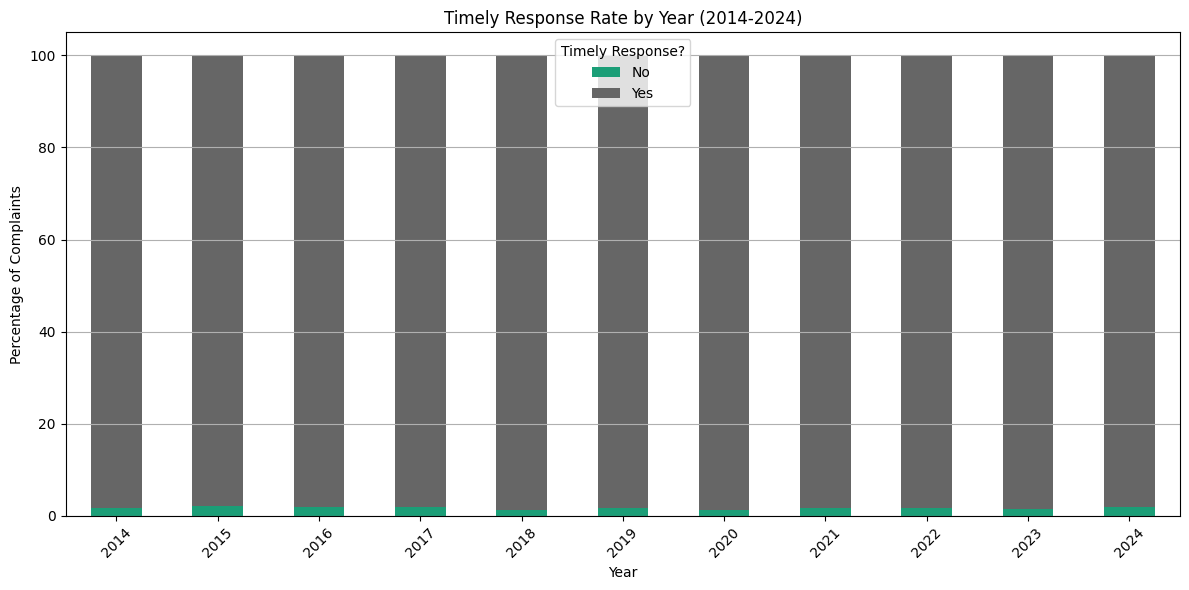

In [186]:
timely_trend = df_decade.groupby(['Year', 'Timely response?']).size().unstack()
timely_percent = timely_trend.div(timely_trend.sum(axis=1), axis=0) * 100

timely_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Dark2')
plt.title('Timely Response Rate by Year (2014-2024)')
plt.ylabel('Percentage of Complaints')
plt.xlabel('Year')
plt.legend(title='Timely Response?')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()